In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler  # To scale all input features that are continuous

In [99]:
# load the data
house_data = pd.read_csv('kc_house_data.csv')

In [100]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [101]:
len(house_data)

21613

In [102]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


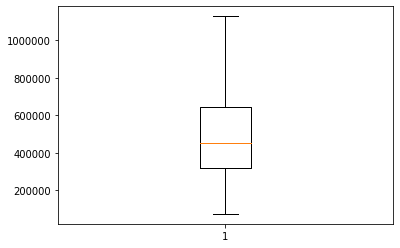

In [103]:
# it is a good idea to visualize the data before bulding the regression model.
# Visualize the distribution of the data

plt.boxplot(house_data['price'], 0, '')
plt.show()

In [104]:
# feature selection , these are dropped since they will not help in determining the price of the house
house_data = house_data.drop(['id', 'date', 'lat', 'long'], axis=1)

In [105]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [106]:
# shuffle the DF.Frac generates a sample form the dataset. reset_index will contain 0-n
house_data = house_data.sample(frac = 1).reset_index(drop=True)

In [107]:
house_data['grade'].unique()

array([ 9,  7,  8,  6,  5, 10, 11,  4, 12,  3,  1, 13])

In [108]:
house_data['yr_built'].unique()

array([2007, 1980, 1960, 1940, 2008, 1926, 1965, 1975, 1954, 1953, 1911,
       1999, 1989, 1922, 1929, 2005, 1994, 1961, 2001, 1903, 2000, 1921,
       1927, 1977, 2012, 1986, 2014, 1968, 1979, 1970, 1958, 1942, 1944,
       1981, 1976, 2006, 1913, 2004, 1987, 1924, 1993, 1990, 1948, 1969,
       2013, 2011, 1950, 1983, 1962, 2009, 1947, 1995, 1988, 1959, 1972,
       1978, 1955, 1943, 2003, 1916, 1992, 1909, 1906, 1920, 1907, 1918,
       1997, 1998, 1956, 1974, 1971, 1957, 1941, 1967, 1908, 1984, 2010,
       1900, 2002, 1966, 1952, 1946, 1933, 1928, 1996, 1910, 1945, 1905,
       1964, 1935, 1985, 1912, 1973, 1982, 1939, 1930, 1925, 1901, 1991,
       1919, 1949, 1934, 1951, 1963, 1917, 1914, 1915, 1923, 1937, 1904,
       1936, 1932, 1902, 1938, 1931, 2015])

In [109]:
# looking for any NaN values in each column
house_data[house_data.isnull().any(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


In [110]:
# Since there are no nan values I can continue
x = house_data.drop('price', axis=1)
y = house_data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [111]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
# model has been buil, how well does it perform
# the value is not very good
linear_model.score(x_train, y_train)

0.6567365349293327

In [113]:
# Check coeficient of eac input.
# + positive effect
# - negative effect
linear_model.coef_

array([-3.76878514e+04,  4.83018049e+04,  1.04956515e+02,  2.77041490e-02,
        2.71034537e+04,  6.36984866e+05,  4.39232591e+04,  2.02512812e+04,
        1.21658187e+05,  4.97877234e+01,  5.51687921e+01, -3.62598493e+03,
        1.20909055e+01,  1.59038743e+00,  2.47256773e+01, -5.58505122e-01])

In [114]:
coefficients = pd.Series(linear_model.coef_, x_train.columns).sort_values()
print(coefficients)

bedrooms         -37687.851444
yr_built          -3625.984927
sqft_lot15           -0.558505
sqft_lot              0.027704
zipcode               1.590387
yr_renovated         12.090905
sqft_living15        24.725677
sqft_above           49.787723
sqft_basement        55.168792
sqft_living         104.956515
condition         20251.281170
floors            27103.453677
view              43923.259115
bathrooms         48301.804921
grade            121658.187033
waterfront       636984.866059
dtype: float64


In [115]:
y_pred = linear_model.predict(x_test)
y_pred


array([270281.8547703 , 686414.08971912, 179219.98394241, ...,
       448306.65999593, 314342.53039316, 352007.90298805])

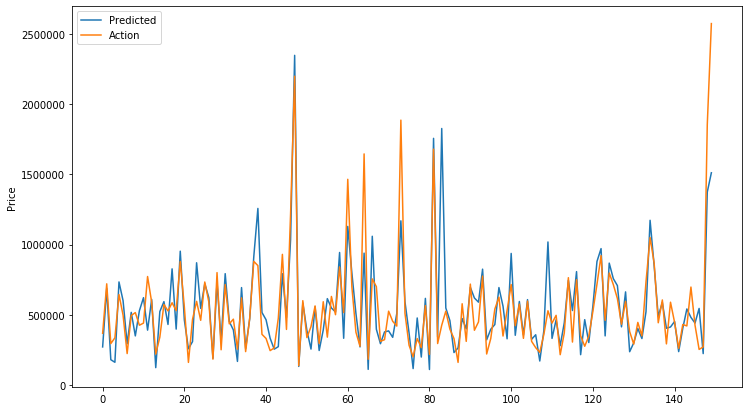

In [116]:
# visualize the test
plt.figure(figsize=(12, 7))

plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Action')
plt.ylabel('Price')
plt.legend()
plt.show()

In [118]:
r_square = linear_model.score(x_test, y_test)
r_square

0.6402162656566323

In [119]:
# how far are my values
model_mse = mean_squared_error(y_pred, y_test)
model_mse

48175733554.140976

In [120]:
# now its in the same scale
math.sqrt(model_mse)

219489.7117273176

In [121]:
x = house_data.drop(['zipcode'], axis=1)
y = house_data[['bedrooms', 'condition', 'grade', 'zipcode']]

In [122]:
x_continuous = house_data[['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                             'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'condition', 'grade']]

In [123]:
x_categorical = house_data[['waterfront', 'view']]

In [124]:
# onehot encoding
x_zipcode = pd.get_dummies(house_data['zipcode'], columns = ['zipcode'])
x_zipcode.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
scaler = MinMaxScaler(feature_range=(0,1))

In [126]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [127]:
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 1))>

In [128]:
scaled_x = scaler.fit_transform(x_continuous)

In [129]:
columns = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                             'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'condition', 'grade']

In [130]:
scaled_df = pd.DataFrame(data=scaled_x, columns = columns)

In [131]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,0.31250,0.178868,0.000877,0.8,0.173246,0.163900,0.930435,0.0,0.213560,0.000825,0.090909,0.50,0.666667
1,0.21875,0.117736,0.009900,0.0,0.108553,0.118257,0.695652,0.0,0.239374,0.009590,0.090909,0.75,0.500000
2,0.12500,0.072453,0.004483,0.0,0.105263,0.000000,0.521739,0.0,0.179143,0.010335,0.090909,0.75,0.500000
3,0.21875,0.101887,0.007863,0.0,0.089912,0.109959,0.347826,0.0,0.235932,0.013726,0.090909,0.50,0.500000
4,0.28125,0.095094,0.000944,0.4,0.138158,0.000000,0.939130,0.0,0.175701,0.001523,0.060606,0.50,0.583333


In [132]:
scaled_df = pd.concat([scaled_df, x_categorical, x_zipcode], axis=1)

In [133]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.31250,0.178868,0.000877,0.8,0.173246,0.163900,0.930435,0.0,0.213560,0.000825,...,0,0,0,0,0,0,0,0,0,0
1,0.21875,0.117736,0.009900,0.0,0.108553,0.118257,0.695652,0.0,0.239374,0.009590,...,0,0,0,0,0,0,0,0,0,0
2,0.12500,0.072453,0.004483,0.0,0.105263,0.000000,0.521739,0.0,0.179143,0.010335,...,0,0,0,0,0,0,0,0,0,0
3,0.21875,0.101887,0.007863,0.0,0.089912,0.109959,0.347826,0.0,0.235932,0.013726,...,0,0,0,0,0,0,0,0,0,0
4,0.28125,0.095094,0.000944,0.4,0.138158,0.000000,0.939130,0.0,0.175701,0.001523,...,0,0,0,0,0,0,0,0,0,0


In [158]:
x2 = scaled_df
y2 = house_data['price']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [159]:
# rebuild LM model
# set fit_intercept to False when working with onehot encoding data
# if LRM tries to fit data we will avoid co-linearity problems due to onehot
linear_model2 = LinearRegression(fit_intercept=False) 
linear_model2 .fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [160]:
linear_model2.score(x_train2, y_train2)

0.8104668828901442

In [161]:
# the r square value is much better than before, 0.65. 
# scalling and encoding has improved the model

In [162]:
linear_model2.coef_

array([ 1.94662404e+05, -8.66533361e+17,  4.03517284e+05, -1.14879521e+05,
        5.96436548e+17,  3.15221947e+17, -8.66777283e+04,  3.67755881e+04,
        5.98447040e+04, -1.07696000e+05, -8.32608000e+05,  1.00864000e+05,
        7.05536000e+05,  7.11856000e+05,  5.56480000e+04, -3.69166000e+05,
       -3.46560000e+05, -3.82206000e+05,  3.92992000e+05, -8.02400000e+04,
       -1.12608000e+05, -1.29928000e+05, -1.25600000e+05, -2.93058000e+05,
       -2.44624000e+05, -2.59132000e+05, -2.82300000e+05, -3.88064000e+05,
       -4.02760000e+05, -2.03979000e+05, -2.02896000e+05, -2.50960000e+05,
       -1.57592000e+05, -3.67232000e+05, -3.53934000e+05, -3.63236000e+05,
        1.00800000e+03, -1.65200000e+05, -3.36032000e+05,  9.25336000e+05,
        1.37792000e+05, -3.63008000e+05, -2.74030000e+05, -1.47232000e+05,
       -1.78872000e+05, -3.25634000e+05, -2.76160000e+05, -3.43440000e+05,
       -2.84720000e+05, -2.80880000e+05, -3.91840000e+05, -2.21120000e+05,
       -1.99888000e+05, -

In [163]:
# there are less coefficients this time
coefficients2 = pd.Series(linear_model2.coef_, x_train2.columns).sort_values()

In [164]:
print(coefficients2)

sqft_living     -8.665334e+17
bedrooms        -8.326080e+05
98092           -4.087360e+05
98023           -4.027600e+05
98070           -3.918400e+05
                     ...     
grade            7.055360e+05
waterfront       7.118560e+05
98039            9.253360e+05
sqft_basement    3.152219e+17
sqft_above       5.964365e+17
Length: 85, dtype: float64


In [165]:
# bedrooms is still negatively correlated
# zip codes also drive the prices down or up depending on the zon


In [166]:
y_pred2 = linear_model2.predict(x_test2)

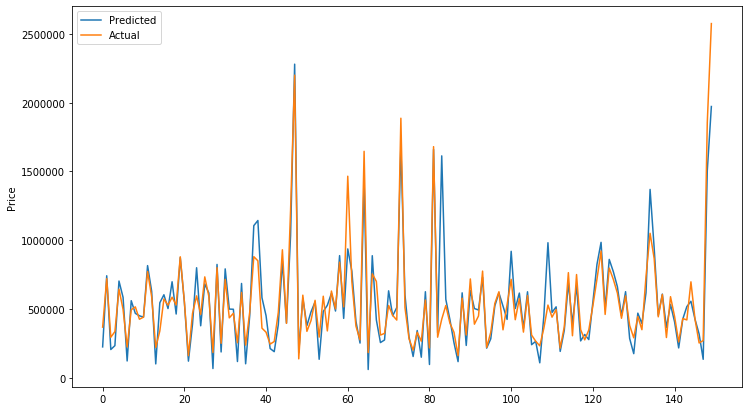

In [167]:
plt.figure(figsize=(12,7))
plt.plot(y_pred2[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')

plt.ylabel('Price')
plt.legend()
plt.show()

In [168]:
r_square2 = linear_model2.score(x_test2, y_test2)
r_square2

0.796888678616632

In [170]:
model_mse2 = mean_squared_error(y_pred2, y_test)
model_mse2

27196996325.175884

In [171]:
math.sqrt(model_mse2)

164915.11854640825

In [ ]:
# Lessons learned:
# Its important to preprocess the features before building the machine learning estimator to give better results. 